In [2]:
import pandas as pd

In [3]:
df_true = pd.read_table("./ecoli_fes_bps_info.tsv")
df_pred = pd.read_table("./ecoli_pred_fes_bps.tsv")

## protein level

In [8]:
true_bps = set(df_true['uniprot'])
pred_bps = set(df_pred['seq_id'])
intersection = true_bps & pred_bps

In [9]:
len(true_bps)
len(pred_bps)
len(intersection)

144

164

132

In [10]:
pred_uniq = pred_bps - intersection
print(pred_uniq)

{'P0AAH4', 'P33030', 'P77252', 'P37313', 'P0AF08', 'P76213', 'P42604', 'P25728', 'P0A6M2', 'P0AFT8', 'P76403', 'P64474', 'P0A8G0', 'P39829', 'P42626', 'P0A9G4', 'P22634', 'P0A744', 'P0AAG0', 'P76104', 'P24192', 'P0A8L5', 'P76027', 'P77622', 'P06715', 'P75860', 'P0AAL9', 'P31443', 'P0A9C0', 'P39384', 'P77737', 'P77268'}


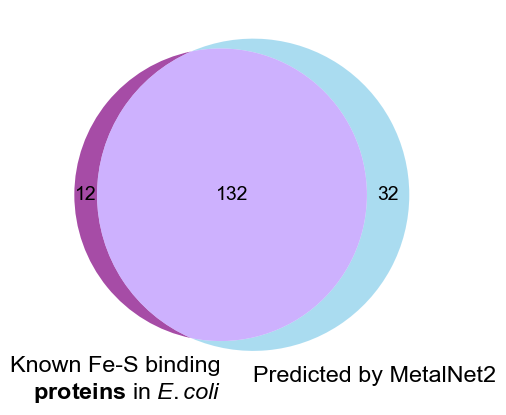

In [11]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

font_cfg = {
    "font.family": "sans-serif",
    "mathtext.fontset": "custom",
    "font.size": 14,
    "font.sans-serif": "Arial"
}
plt.rcParams.update(font_cfg)

v = venn2(subsets=(
    len(true_bps) - len(intersection), 
    len(pred_bps) - len(intersection), 
    len(intersection),
    ), 
    set_labels=('Known Fe-S binding\n ' + r'$\bf{proteins}$' + ' in ' + r'$\it{E.coli}$', 'Predicted by MetalNet2'),
    set_colors=('purple', 'skyblue'),
    alpha=0.7
)

for text in v.subset_labels:
    text.set_visible(True)

plt.savefig("./fig/venn_ecoli_fes_anno_pred.pdf", bbox_inches="tight", transparent=True)

## site or residue level

In [4]:
true_sites = set()
true_residues = set()

for _, row in df_true.iterrows():
    seq_id = row['uniprot']
    sites_info = row['sites_resi_seq_num']

    if not isinstance(sites_info, str): continue

    for s in row['sites_resi_seq_num'].split(","):
        sites = set()
        for r in s.split("-"):
            posi = int(r[1:]) - 1
            sites.add(str(posi))
            true_residues.add((seq_id, posi))
        true_sites.add((seq_id, ",".join(sites)))

pred_residues = set()
for _, row in df_pred.iterrows():
    pred_residues.add((row['seq_id'], row['resi_seq_posi']))

cov_resi = true_residues & pred_residues
cov_sites = set()
for seq_id, posis in true_sites:
    site = set()
    for r in posis.split(","):
        site.add((seq_id, int(r)))
    if len(site & pred_residues) != 0:
        cov_sites.add((seq_id, posis))

In [5]:
len(true_residues)
len(pred_residues)
len(cov_resi)
len(true_sites)
len(cov_sites)

len(cov_resi) / len(true_residues)
len(cov_sites) / len(true_sites)

822

1014

724

222

203

0.8807785888077859

0.9144144144144144

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


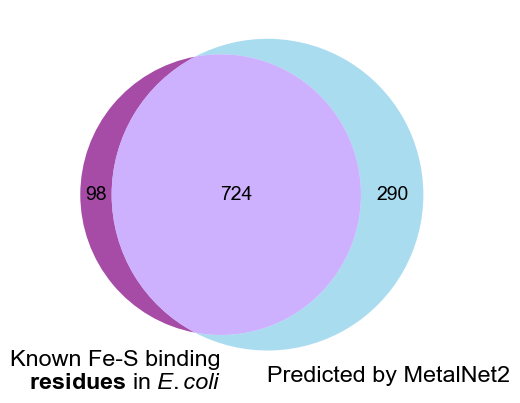

In [7]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

font_cfg = {
    "font.family": "sans-serif",
    "mathtext.fontset": "custom",
    "font.size": 14,
    "font.sans-serif": "Arial"
}
plt.rcParams.update(font_cfg)


v = venn2(subsets=(
    len(true_residues) - len(cov_resi), 
    len(pred_residues) - len(cov_resi), 
    len(cov_resi),
    ), 
    set_labels=('Known Fe-S binding\n ' + r'$\bf{residues}$' + ' in ' + r'$\it{E.coli}$', 'Predicted by MetalNet2'),
    set_colors=('purple', 'skyblue'),
    alpha=0.7
)

for text in v.subset_labels:
    text.set_visible(True)

plt.savefig("./fig/venn_ecoli_fes_anno_pred_resi.pdf", bbox_inches="tight", transparent=True)